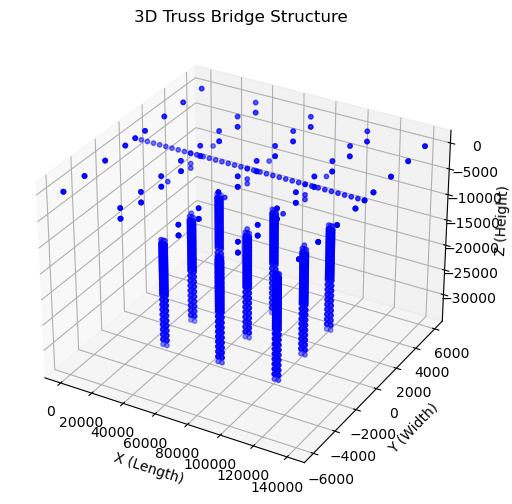


The truss bridge consists of a series of connected nodes forming a structural system.
- **Length:** 140000.00 units
- **Width:** 11900.00 units
- **Height:** 33050.00 units
- **Node count:** 1892
- **Element count:** 1773

The structure primarily includes:
- Automatically detected **top and bottom chords**.
- **Vertical members** connecting different levels.
- **Diagonal members** for load distribution.

This truss bridge design ensures **load distribution efficiency** and **structural stability** for spanning a given distance.



In [1]:
from openseespy.opensees import *
from Node import define_nodes  # Import node definition
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np
from scipy.spatial import KDTree

model('basic', '-ndm', 3, '-ndf', 6)

# Define nodes
define_nodes()

# Function to extract node coordinates
def get_node_coordinates():
    node_tags = getNodeTags()  # Get all node IDs
    coordinates = {tag: tuple(nodeCoord(tag)) for tag in node_tags}  # Store as dictionary
    return coordinates

# Get node coordinates
coordinates = get_node_coordinates()

# Convert to array for easy processing
node_list = np.array(list(coordinates.values()))
node_tags = list(coordinates.keys())

# Build KDTree for quick nearest neighbor searches
tree = KDTree(node_list)

# Function to find connections automatically
def find_connections():
    connections = set()
    tolerance = 50  # Adjust this threshold based on expected node spacing

    for i, node1 in enumerate(node_tags):
        coord1 = coordinates[node1]
        # Find nearest nodes within tolerance
        nearby_indices = tree.query_ball_point(coord1, r=tolerance)

        for j in nearby_indices:
            node2 = node_tags[j]
            coord2 = coordinates[node2]

            # Check if it's a valid connection (avoid self-connections)
            if node1 != node2:
                # Ensure unique connections (sorted to prevent duplicates)
                connections.add(tuple(sorted((node1, node2))))
    
    return list(connections)

# Get automatically detected connections
connections = find_connections()

# Extract bridge dimensions
x_vals, y_vals, z_vals = zip(*coordinates.values())
bridge_length = max(x_vals) - min(x_vals)
bridge_width = max(y_vals) - min(y_vals)
bridge_height = max(z_vals) - min(z_vals)

# Function to plot the truss bridge
def plot_truss():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot nodes as points
    ax.scatter(x_vals, y_vals, z_vals, c='blue', marker='o', s=10)

    # Plot members as lines
    segments = [(coordinates[n1], coordinates[n2]) for n1, n2 in connections]
    line_collection = Line3DCollection(segments, colors='black', linewidths=1)
    ax.add_collection3d(line_collection)

    # Labels
    ax.set_xlabel('X (Length)')
    ax.set_ylabel('Y (Width)')
    ax.set_zlabel('Z (Height)')
    ax.set_title('3D Truss Bridge Structure')

    plt.show()

# Plot the truss bridge
plot_truss()

# Text description of the bridge
bridge_description = f"""
The truss bridge consists of a series of connected nodes forming a structural system.
- **Length:** {bridge_length:.2f} units
- **Width:** {bridge_width:.2f} units
- **Height:** {bridge_height:.2f} units
- **Node count:** {len(coordinates)}
- **Element count:** {len(connections)}

The structure primarily includes:
- Automatically detected **top and bottom chords**.
- **Vertical members** connecting different levels.
- **Diagonal members** for load distribution.

This truss bridge design ensures **load distribution efficiency** and **structural stability** for spanning a given distance.
"""

# Print description
print(bridge_description)


In [2]:
import Parameters  # Define parameters

In [3]:
import openseespy.opensees as ops
from Node import define_nodes
from Restraint import restraints  # Import the restraints list from Restraint.py

ops.model('basic', '-ndm', 3, '-ndf', 6)

# Apply restraints inside the main script
for node_id, dx, dy, dz, rx, ry, rz in restraints:
    ops.fix(node_id, dx, dy, dz, rx, ry, rz)  # Apply fixity
    print(f"Applied fixity to node {node_id}: [{dx}, {dy}, {dz}, {rx}, {ry}, {rz}]")

Applied fixity to node 101: [0, 0, 1, 0, 0, 0]
Applied fixity to node 131: [0, 0, 1, 0, 1, 0]
Applied fixity to node 161: [1, 1, 1, 1, 1, 1]
Applied fixity to node 102: [0, 0, 1, 0, 0, 0]
Applied fixity to node 132: [0, 0, 1, 0, 1, 0]
Applied fixity to node 162: [1, 1, 1, 1, 1, 1]
Applied fixity to node 103: [0, 0, 1, 0, 0, 0]
Applied fixity to node 133: [0, 0, 1, 0, 1, 0]
Applied fixity to node 163: [1, 1, 1, 1, 1, 1]
Applied fixity to node 104: [0, 0, 1, 0, 0, 0]
Applied fixity to node 134: [0, 0, 1, 0, 1, 0]
Applied fixity to node 164: [1, 1, 1, 1, 1, 1]
Applied fixity to node 105: [0, 0, 1, 0, 0, 0]
Applied fixity to node 135: [0, 0, 1, 0, 1, 0]
Applied fixity to node 165: [1, 1, 1, 1, 1, 1]
Applied fixity to node 106: [0, 0, 1, 0, 0, 0]
Applied fixity to node 136: [0, 0, 1, 0, 1, 0]
Applied fixity to node 166: [1, 1, 1, 1, 1, 1]
Applied fixity to node 107: [0, 0, 1, 0, 0, 0]
Applied fixity to node 137: [0, 0, 1, 0, 1, 0]
Applied fixity to node 167: [1, 1, 1, 1, 1, 1]
Applied fixit

In [4]:
import openseespy.opensees as ops
from Constraint import apply_constraints, constraints  # Import constraints

# Apply constraints
apply_constraints()

# Verify constraints
print("\n🛠 **Constraints Verification**")
for retained, constrained, dof in constraints:
    print(f"✔ Node {constrained} constrained to Node {retained} on DOFs: {dof}")


✔ Constraint applied: Node 210 follows Node 2110 on DOFs [3]
✔ Constraint applied: Node 211 follows Node 2111 on DOFs [3]
✔ Constraint applied: Node 212 follows Node 2112 on DOFs [3]
✔ Constraint applied: Node 213 follows Node 2113 on DOFs [3]
✔ Constraint applied: Node 217 follows Node 2117 on DOFs [3]
✔ Constraint applied: Node 216 follows Node 2116 on DOFs [3]
✔ Constraint applied: Node 215 follows Node 2115 on DOFs [3]
✔ Constraint applied: Node 214 follows Node 2114 on DOFs [3]
✔ Constraint applied: Node 301 follows Node 201 on DOFs [1, 2, 3]
✔ Constraint applied: Node 302 follows Node 202 on DOFs [1, 2, 3]
✔ Constraint applied: Node 303 follows Node 203 on DOFs [1, 2, 3]
✔ Constraint applied: Node 304 follows Node 204 on DOFs [1, 2, 3]
✔ Constraint applied: Node 305 follows Node 205 on DOFs [1, 2, 3]
✔ Constraint applied: Node 306 follows Node 206 on DOFs [1, 2, 3]
✔ Constraint applied: Node 307 follows Node 207 on DOFs [1, 2, 3]
✔ Constraint applied: Node 308 follows Node 208 on

In [5]:
import Mass

In [6]:
import openseespy.opensees as ops
from Node import define_nodes
from Restraint import restraints
from Constraint import apply_constraints, constraints
from Mass import apply_masses, masses  # ✅ Import mass function and list

ops.model('basic', '-ndm', 3, '-ndf', 6)

# Apply masses
print("\n🛠 Applying Masses...")
applied_masses = apply_masses()  # ✅ Store returned masses for verification
print("✅ Masses successfully applied!\n")

# Verify applied masses in OpenSees
print("\n🛠 **Mass Verification**")
for nodeTag, _, _, _, _, _, _ in applied_masses:
    applied_mass = ops.nodeMass(nodeTag)  # Get mass from OpenSees
    print(f"✔ Node {nodeTag} - OpenSees Mass: {applied_mass}")



🛠 Applying Masses...
✔ Mass applied at Node 105: 33.965, 33.965, 33.965, 0.0, 0.0, 0.0
✔ Mass applied at Node 205: 33.965, 33.965, 33.965, 0.0, 0.0, 0.0
✔ Mass applied at Node 191: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 192: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 193: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 194: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 195: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 196: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 197: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 198: 67.93, 67.93, 67.93, 0.0, 0.0, 0.0
✔ Mass applied at Node 3101: 48.839, 48.839, 48.839, 0.0, 0.0, 0.0
✔ Mass applied at Node 3102: 48.839, 48.839, 48.839, 0.0, 0.0, 0.0
✔ Mass applied at Node 5101: 62.475, 62.475, 62.475, 0.0, 0.0, 0.0
✔ Mass applied at Node 305: 33.965, 33.965, 33.965, 0.0, 0.0, 0.0
✔ Mass applied at Node 405: 33.965, 33.965, 33.965, 0.0, 0.0, 0.0
✔ Mass ap

In [7]:
import GeoTrans  # Define geometric transformations
# Now call the function that sets up your uniaxial materials
GeoTrans.defineGeoTrans()

Geometric transformations applied successfully.


In [8]:
import openseespy.opensees as ops
import SectionMat  # Import the Python file containing defineSectionMaterials()

# Start defining your model
ops.model('basic', '-ndm', 3, '-ndf', 6)

# Now call the function that sets up your uniaxial materials
SectionMat.defineSectionMaterials()

# ------------
# Continue with the rest of your model-building commands, for example:
# ops.node(1, 0.0, 0.0, 0.0)
# ops.node(2, 5.0, 0.0, 0.0)
# ops.element('truss', ...)
# ...
# ------------


Section materials defined.


In [9]:
import openseespy.opensees as ops


# Now import ColSection
import ColSection

# Start a new model
ops.model('basic', '-ndm', 3, '-ndf', 6)

# Define the column section (fibers, etc.)
ColSection.defineColSection()

# After this, your section with ID=1 is ready to be used.
# Next, continue building your nodes, elements, constraints, loads, analysis, etc.

# Example usage:
# ops.node(1, 0.0, 0.0, 0.0)
# ops.node(2, 0.0, 0.0, 3.0)
# ...
# ops.element('forceBeamColumn', 1, 1, 2, numIntgrPts, 1, ...)
# ...


ColSection defined.


In [10]:
import openseespy.opensees as ops
import Element  # This just *loads* the module, doesn't run define_elements()

ops.model('Basic', '-ndm', 3, '-ndf', 6)

# Now call the function to create the elements:
Element.define_elements()

# Because define_elements() is now called, 
# you should see the print statements, e.g.:
#
#   ✅ <number> elements have been successfully defined in OpenSees.
#   Element defined.

# Continue your analysis or other definitions...



✅ 797 elements have been successfully defined in OpenSees.


In [11]:
import ZeroLengthElement
ZeroLengthElement.defineZeroLengthElement()  # Same exact capitalization

ZeroLengthElement defined.


In [12]:
import Load

# now define loads
Load.defineLoads()

Load pattern and loads applied successfully.


In [13]:
import openseespy.opensees as ops

# -- Step 1: Set up the analysis --
ops.constraints("Transformation")       # how boundary conditions are enforced
ops.numberer("RCM")                    # renumber dof's to minimize bandwidth
ops.system("BandGeneral")              # solver for the system of equations
ops.algorithm("Newton")                # use Newton's method
ops.test("NormDispIncr", 1.0e-6, 1000) # convergence test (tolerance, maxIter)
ops.integrator("LoadControl", 1.0)     # apply the loads in a single step
ops.analysis("Static")                 # define the analysis type

# -- Step 2: Run the gravity analysis --
result = ops.analyze(1)
if result != 0:
    print("Gravity analysis failed to converge.")
else:
    print("Gravity analysis completed successfully.")

# -- Step 3: Lock in the deformed shape under gravity --
ops.loadConst("-time", 0.0)

all_nodes = ops.getNodeTags()
for n in all_nodes:
    disp = ops.nodeDisp(n)
    print(f"Node {n} disp = {disp}")


Gravity analysis completed successfully.
Node 101 disp = [-6.969868665110536e-05, 5.649010013858416e-16, 0.0, -3.702485197952935e-27, 0.0062070848795661255, 2.980949168917604e-12]
Node 102 disp = [-6.970367382957785e-05, 5.649116535350621e-16, 0.0, 7.404970395904171e-27, 0.0062070848795661255, 2.8390048489180004e-12]
Node 103 disp = [-6.970809795620839e-05, 5.649329581013086e-16, 0.0, -2.591739641906939e-26, 0.0062070848795661255, 2.2712169113493315e-12]
Node 104 disp = [-6.971099376802776e-05, 5.649649156202075e-16, 0.0, 9.62646152803734e-26, 0.0062070848795661255, 9.936659467043723e-13]
Node 105 disp = [-6.971143618686017e-05, 5.649862212577192e-16, 0.0, -2.7583514763158724e-25, 0.0062070848795661255, 1.2167924465538187e-20]
Node 106 disp = [-6.971099376804845e-05, 5.649649156202067e-16, 0.0, 9.626461528082229e-26, 0.0062070848795661255, -9.93665922370124e-13]
Node 107 disp = [-6.970809795627043e-05, 5.649329581013078e-16, 0.0, -2.5917396421759805e-26, 0.0062070848795661255, -2.27121

In [14]:
n=101

disp = ops.nodeDisp(n)  # [ux, uy, uz, rx, ry, rz] in 3D
print(f"Node {n} displacements: {disp}")

forces_local = ops.eleResponse(n, "force")  
print(f"Element {n} local-end-forces: {forces_local}")

rxn = ops.nodeReaction(n)  # [Rx, Ry, Rz, Mx, My, Mz]
print(f"Reaction at node {n}: {rxn}")


Node 101 displacements: [-6.969868665110536e-05, 5.649010013858416e-16, 0.0, -3.702485197952935e-27, 0.0062070848795661255, 2.980949168917604e-12]
Element 101 local-end-forces: [0.23246452130005962, -1.4828418311852895e-12, 1.81908606663355e-14, -4.730439128037627e-24, 0.0, 2.800106813083403e-10, -0.23246452130005962, 1.4828418311852895e-12, -1.81908606663355e-14, 3.092446313277508e-11, 0.0, -395.1896862103814]
Reaction at node 101: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [15]:
ops.printModel()  

Current Domain Information
	Current Time: 0
	Committed Time: 0
NODE DATA: NumNodes: 1892

numComponents: 1892

 Node: 101
	Coordinates  : 0 -5950 0 
	Disps: -6.96987e-05 5.64901e-16 0 -3.70249e-27 0.00620708 2.98095e-12 
	Velocities   : 0 0 0 0 0 0 
	 unbalanced Load: 0 0 0 0 0 0 
	 reaction: 0 0 0 0 0 0 
	ID : 4522 4523 -1 4524 4525 4526 


 Node: 102
	Coordinates  : 0 -4250 0 
	Disps: -6.97037e-05 5.64912e-16 0 7.40497e-27 0.00620708 2.839e-12 
	Velocities   : 0 0 0 0 0 0 
	 unbalanced Load: 0 0 0 0 0 0 
	ID : 4517 4518 -1 4519 4520 4521 


 Node: 103
	Coordinates  : 0 -2550 0 
	Disps: -6.97081e-05 5.64933e-16 0 -2.59174e-26 0.00620708 2.27122e-12 
	Velocities   : 0 0 0 0 0 0 
	 unbalanced Load: 0 0 0 0 0 0 
	ID : 4508 4509 -1 4510 4511 4512 


 Node: 104
	Coordinates  : 0 -850 0 
	Disps: -6.9711e-05 5.64965e-16 0 9.62646e-26 0.00620708 9.93666e-13 
	Velocities   : 0 0 0 0 0 0 
	 unbalanced Load: 0 0 0 0 0 0 
	ID : 4499 4500 -1 4501 4502 4503 


 Node: 105
	Coordinates  : 0 0 0 
	Dis

In [16]:
ops.printModel("-JSON", "modelOutput.json")